In [1]:
import sys
import os
import sklearn
import graphviz
import pandas as pd
import graphviz.backend as be
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [2]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

# Set up the dataset


In [3]:
random_state = 1234  # get reproducible trees

# dataset_url = (
#     "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
# )

dataset_url = "../dados./titanic.csv"

dataset = pd.read_csv(dataset_url)

# salvar um bkp dentro da pasta dados
dataset.to_csv("../dados/titanic_bkp.csv")

# Fill missing values for Age
dataset.fillna({"Age": dataset.Age.mean()}, inplace=True)

# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

# Set up the pipeline


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [5]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [6]:
model = make_pipeline(
    VarianceThreshold(0.5),
    PolynomialFeatures(degree=2, interaction_only=True),
    DecisionTreeClassifier(max_depth=4),
)

In [7]:
model.fit(dataset[features], dataset[target])

Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.5)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4))])

### Extract relevant parameters for `dtreeviz` from the pipeline

As the model used has several preprocessing steps prior the decision tree, its feature space is different from `dataset[features]`. Hence, we first have to extract the relevant parameters from the pipeline before passing them to `dtreeviz`. Here, we use the following helper function from the `dtreeviz.utils` module:


In [8]:
from dtreeviz.utils import extract_params_from_pipeline

In [9]:
tree_classifier, X_train, features_model = extract_params_from_pipeline(
    pipeline=model, X_train=dataset[features], feature_names=features
)

In [10]:
y_train = dataset[target]

In [11]:
features_model

['1',
 'Pclass',
 'Age',
 'Fare',
 'Cabin_label',
 'Embarked_label',
 'Pclass Age',
 'Pclass Fare',
 'Pclass Cabin_label',
 'Pclass Embarked_label',
 'Age Fare',
 'Age Cabin_label',
 'Age Embarked_label',
 'Fare Cabin_label',
 'Fare Embarked_label',
 'Cabin_label Embarked_label']

In [27]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_label,Cabin_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,-1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,-1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,60,0


## Initialize dtreeviz model (adaptor)


[Text(0.5625, 0.9, 'x[11] <= -6.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.3333333333333333, 0.7, 'x[9] <= 5.0\ngini = 0.402\nsamples = 650\nvalue = [469, 181]'),
 Text(0.16666666666666666, 0.5, 'x[13] <= -15.148\ngini = 0.477\nsamples = 326\nvalue = [198, 128]'),
 Text(0.08333333333333333, 0.3, 'x[2] <= 55.5\ngini = 0.5\nsamples = 138\nvalue = [67, 71]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.497\nsamples = 132\nvalue = [61, 71]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.25, 0.3, 'x[11] <= -17.5\ngini = 0.423\nsamples = 188\nvalue = [131, 57]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.396\nsamples = 173\nvalue = [126, 47]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.5, 0.5, 'x[10] <= 173.679\ngini = 0.274\nsamples = 324\nvalue = [271, 53]'),
 Text(0.4166666666666667, 0.3, 'x[10] <= 169.85\ngini = 0.379\nsamples = 67\nvalue = [50, 17]'),
 Text(0.375, 0.1, 'gini = 0.339\nsamples = 60\nva

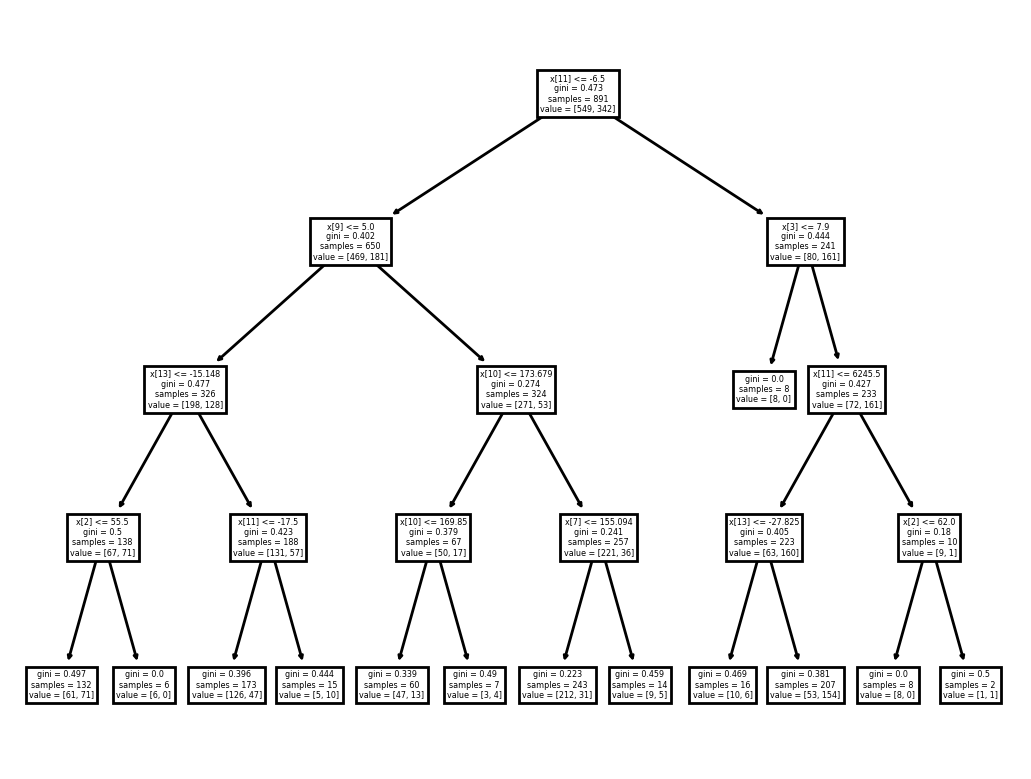

In [12]:
from sklearn.tree import plot_tree

plot_tree(tree_classifier)

In [13]:
viz_model = dtreeviz.model(
    tree_classifier,
    X_train=X_train,
    y_train=y_train,
    feature_names=features_model,
    target_name=target,
    class_names=["perish", "survive"],
)

## Tree structure visualizations


To show the decision tree structure using the default visualization, call `view()`:


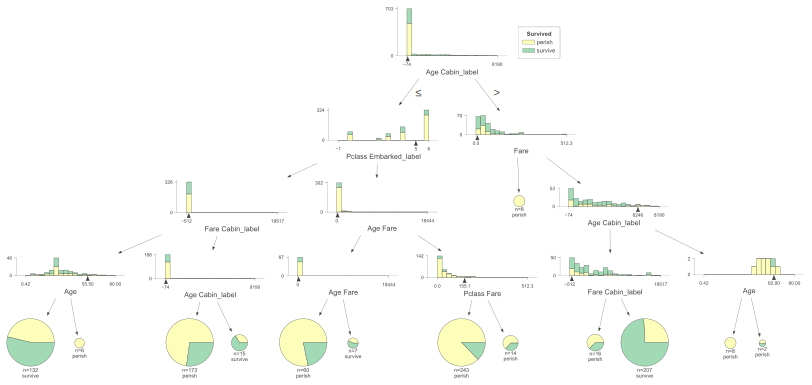

In [14]:
viz_model.view(scale=0.8)

To change the visualization, you can pass parameters, such as changing the orientation to left-to-right:


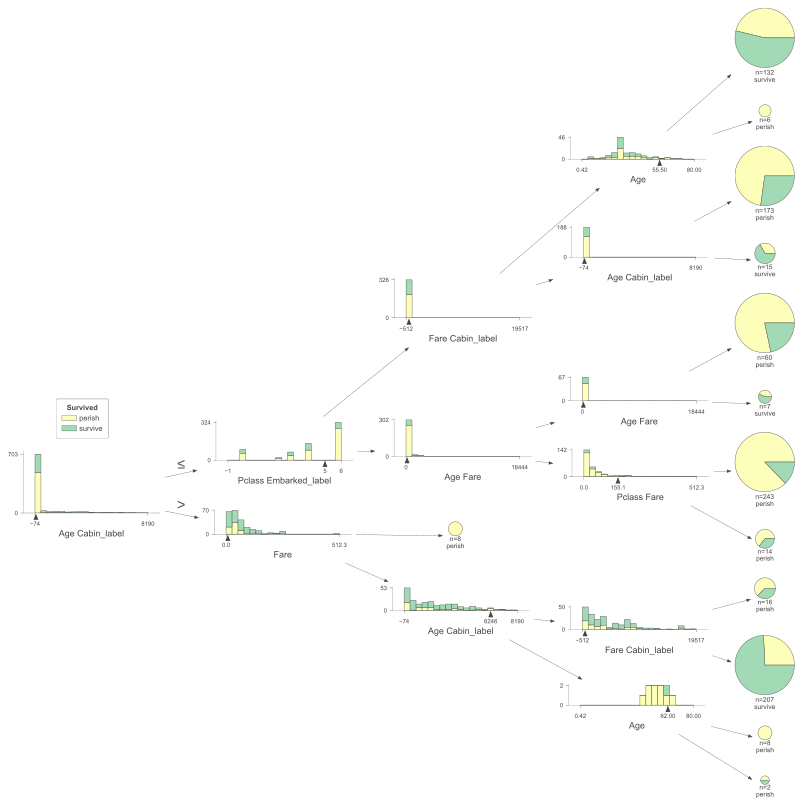

In [15]:
viz_model.view(orientation="LR")

To visualize larger trees, you can reduce the amount of detail by turning off the fancy view:


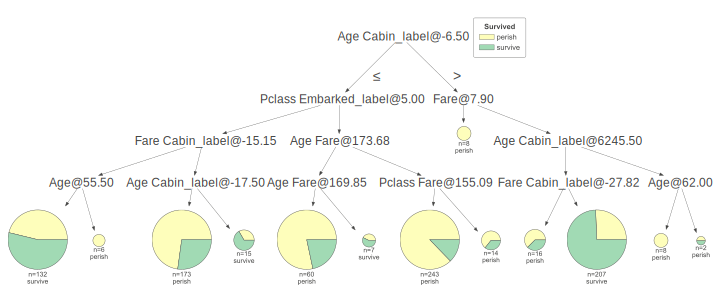

In [16]:
viz_model.view(fancy=False)

Another way to reduce the visualization size is to specify the tree depths of interest:


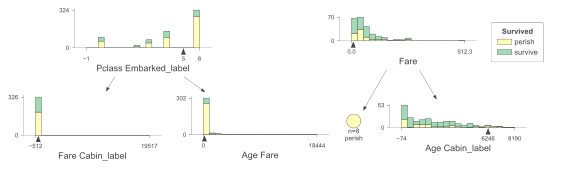

In [17]:
viz_model.view(depth_range_to_display=(1, 2))  # root is level 0

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:


In [18]:
x = X_train.iloc[10]
x

1                                1.0
Pclass                           3.0
Age                              4.0
Fare                            16.7
Cabin_label                    145.0
Embarked_label                   2.0
Pclass Age                      12.0
Pclass Fare                     50.1
Pclass Cabin_label             435.0
Pclass Embarked_label            6.0
Age Fare                        66.8
Age Cabin_label                580.0
Age Embarked_label               8.0
Fare Cabin_label              2421.5
Fare Embarked_label             33.4
Cabin_label Embarked_label     290.0
Name: 10, dtype: float64

and then display the path through the tree structure:


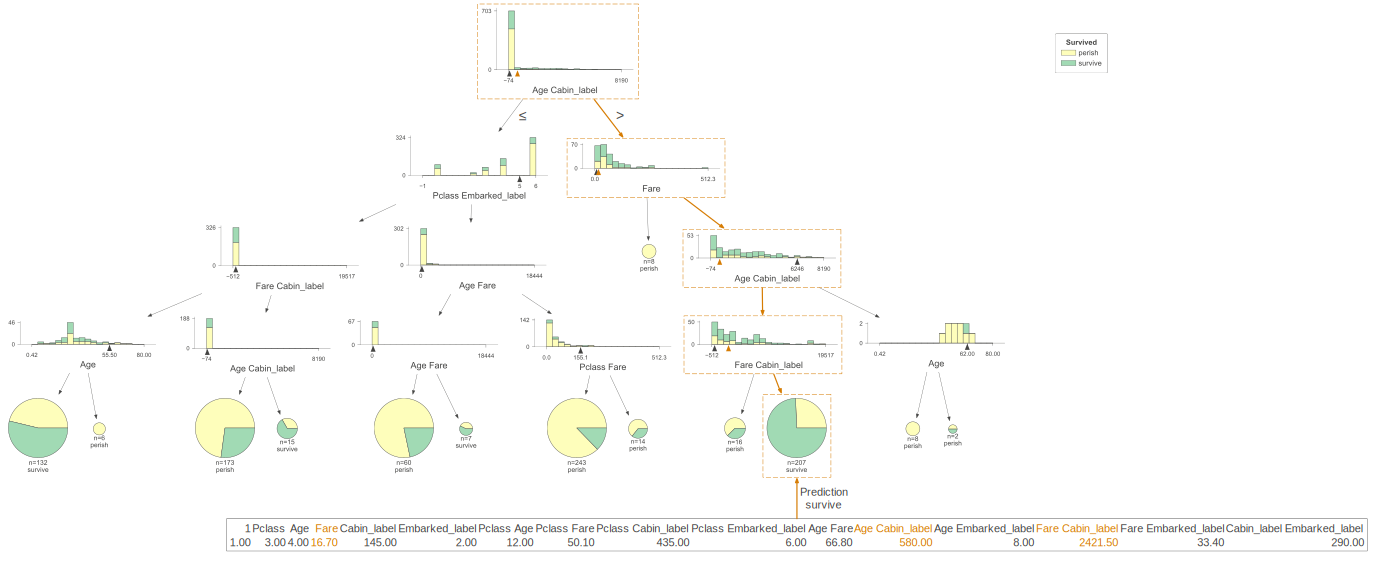

In [19]:
viz_model.view(x=x)

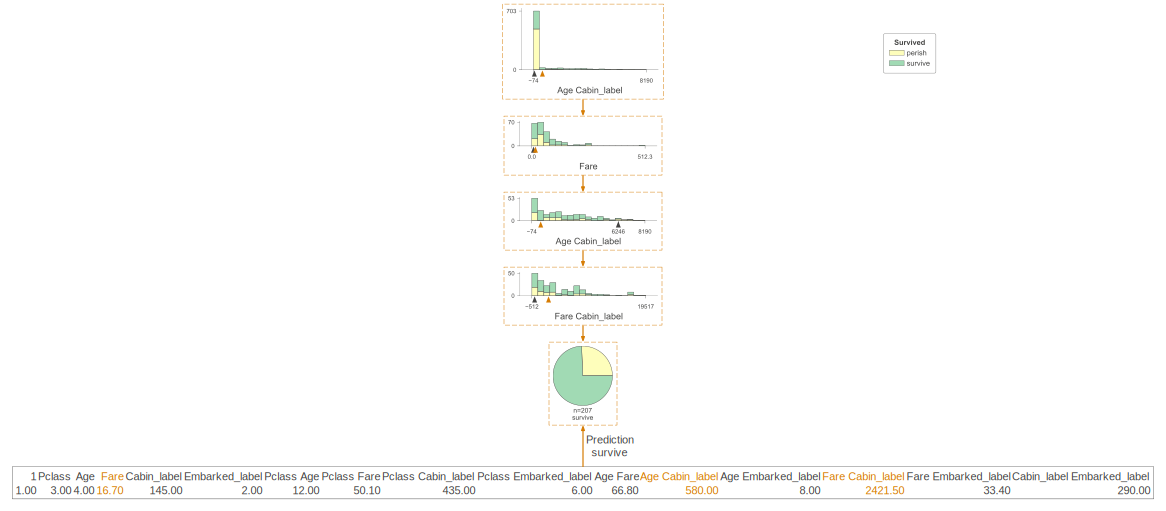

In [20]:
viz_model.view(x=x, show_just_path=True)

You can also get a string representation explaining the comparisons made as an instance is run down the tree:


In [21]:
print(viz_model.explain_prediction_path(x))

7.9 <= Fare 
-6.5 <= Age Cabin_label  < 6245.5
-27.82 <= Fare Cabin_label 



If you'd like the feature importance for a specific instance, as calculated by the underlying decision tree library, use `instance_feature_importance()`:


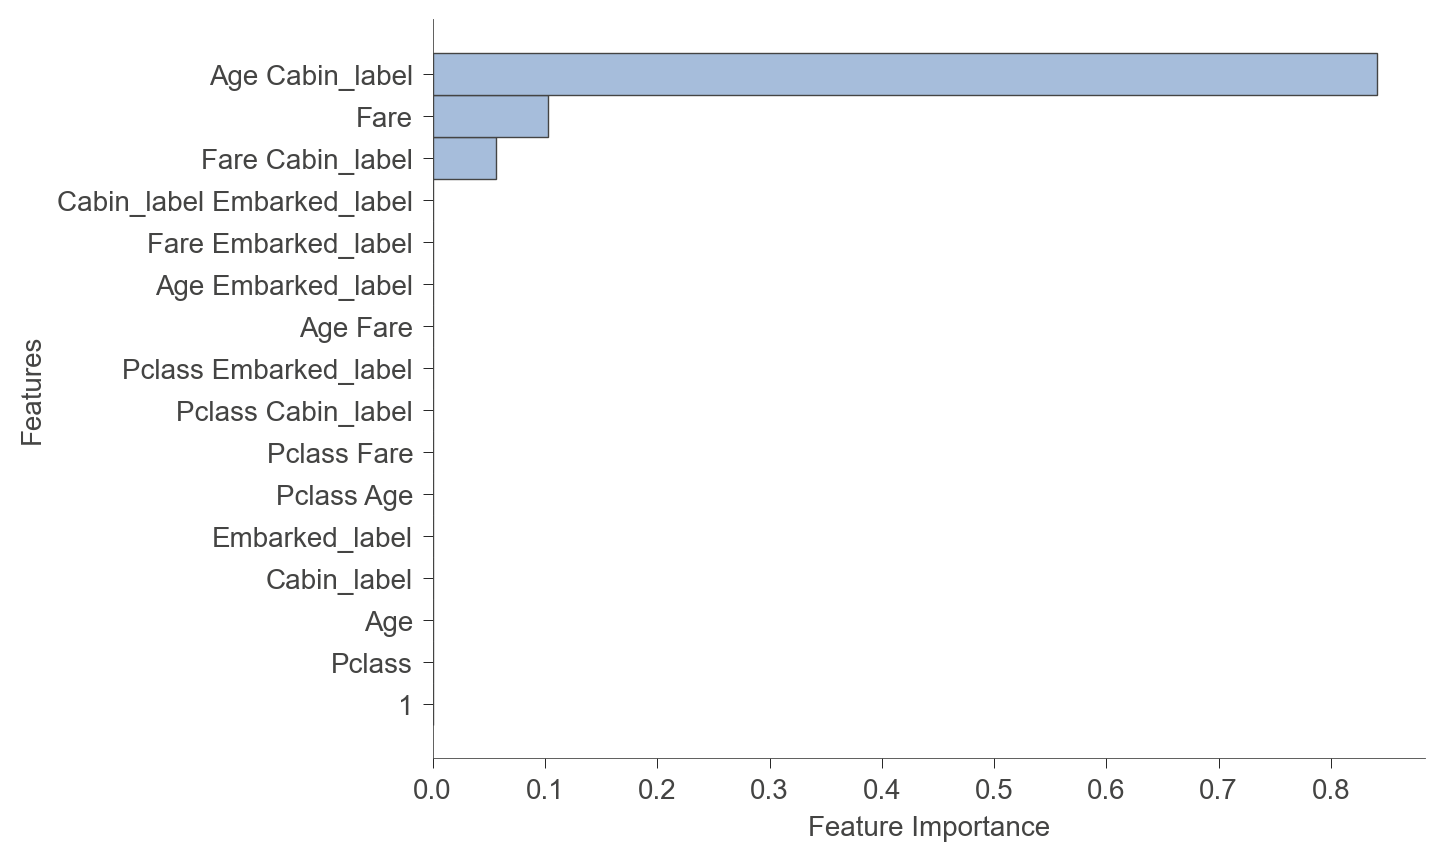

In [22]:
viz_model.instance_feature_importance(x)

## Leaf info

There are a number of functions to get information about the leaves of the tree.


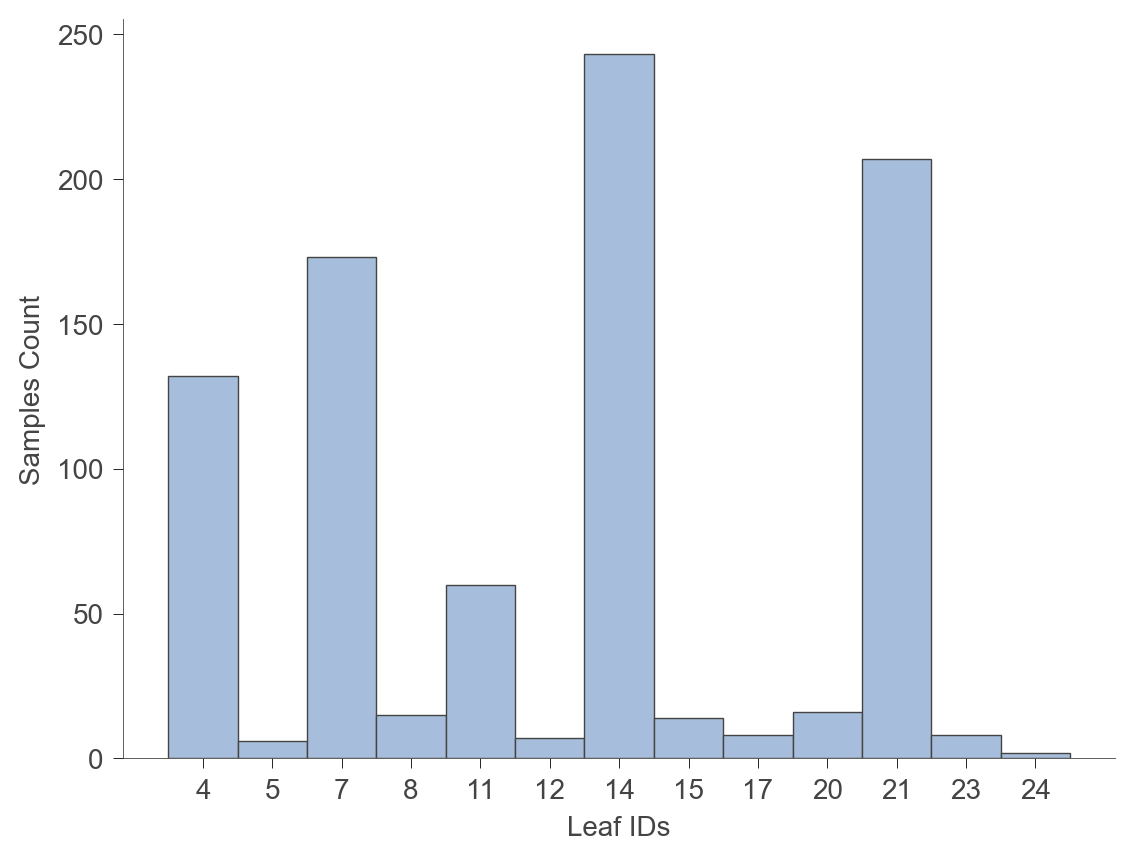

In [23]:
viz_model.leaf_sizes()

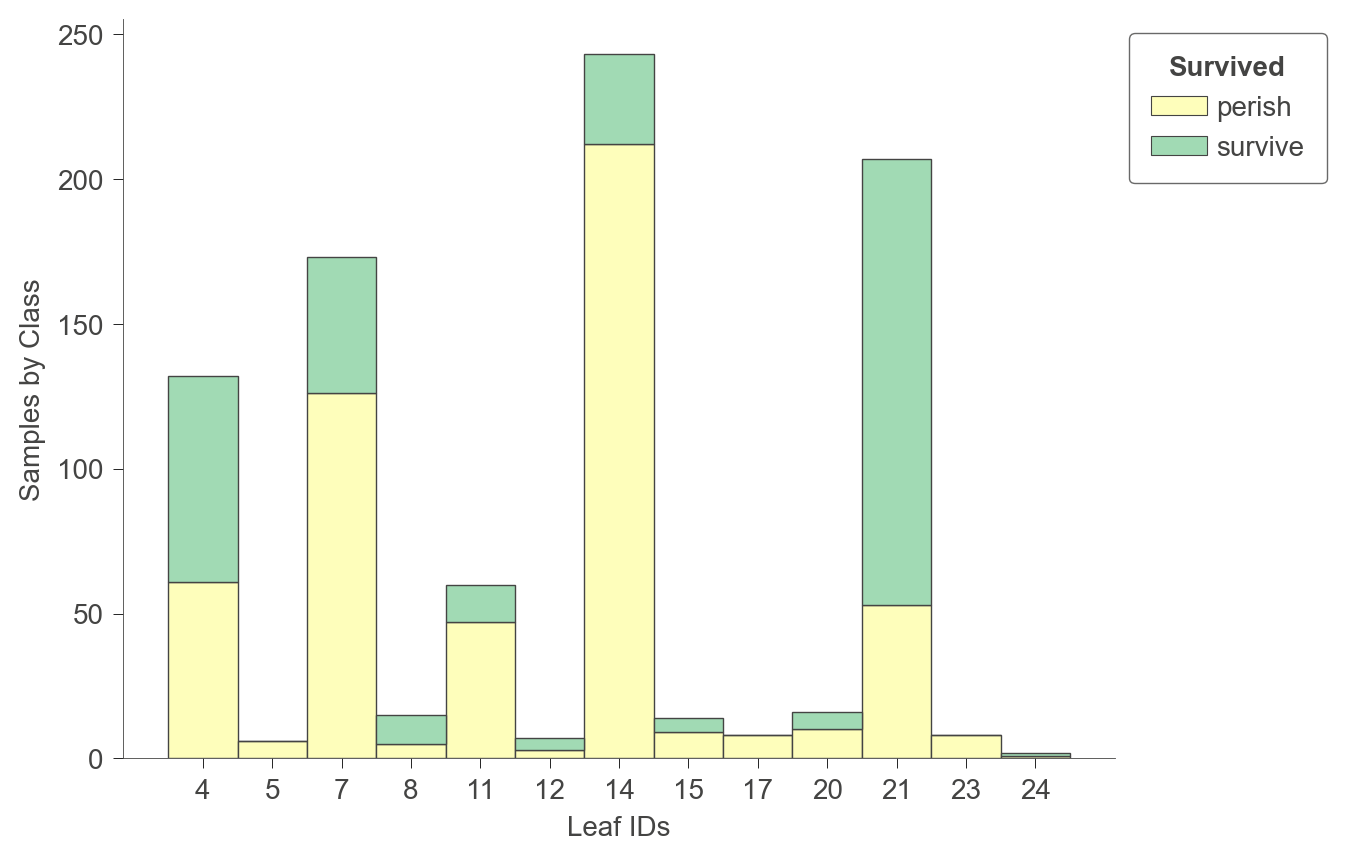

In [24]:
viz_model.ctree_leaf_distributions()

In [25]:
viz_model.node_stats(node_id=14)

,1,Pclass,Age,Fare,Cabin_label,Embarked_label,Pclass Age,Pclass Fare,Pclass Cabin_label,Pclass Embarked_label,Age Fare,Age Cabin_label,Age Embarked_label,Fare Cabin_label,Fare Embarked_label,Cabin_label Embarked_label
count,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0
mean,1.0,3.0,30.080466,13.064468,-1.0,2.0,90.241398,39.193405,-3.0,6.0,365.770829,-30.080466,60.160932,-13.064468,26.128937,-2.0
std,0.0,0.0,9.71377,9.057148,0.0,0.0,29.141311,27.171443,0.0,0.0,256.760779,9.71377,19.427541,9.057148,18.114295,0.0
min,1.0,3.0,7.0,6.2375,-1.0,2.0,21.0,18.7125,-3.0,6.0,173.7076,-74.0,14.0,-46.9,12.475,-2.0
25%,1.0,3.0,25.0,7.8958,-1.0,2.0,75.0,23.6874,-3.0,6.0,223.064169,-33.5,50.0,-15.975,15.7916,-2.0
50%,1.0,3.0,29.699118,8.05,-1.0,2.0,89.097353,24.15,-3.0,6.0,266.0,-29.699118,59.398235,-8.05,16.1,-2.0
75%,1.0,3.0,33.5,15.975,-1.0,2.0,100.5,47.925,-3.0,6.0,414.575,-25.0,67.0,-7.8958,31.95,-2.0
max,1.0,3.0,74.0,46.9,-1.0,2.0,222.0,140.7,-3.0,6.0,2016.7,-7.0,148.0,-6.2375,93.8,-2.0


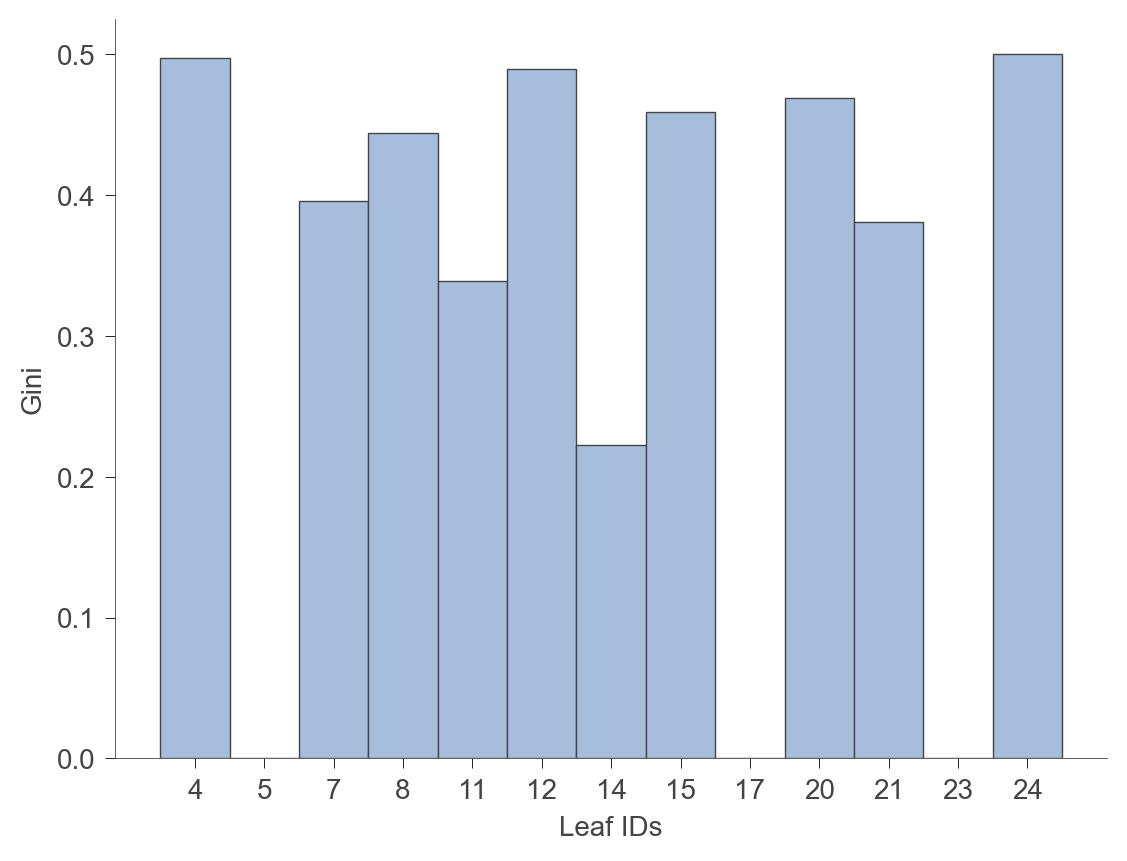

In [26]:
viz_model.leaf_purity()